# Projeto de Estatística 2

## 1. Avaliando o conteúdo da database

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

Antes de qualquer EDA que eu possa realizar me arrisco a palpitar que o *target*, média de mortes por cancer a cada 100 mil habitantes, pode ser influenciado por:
- numéro médio de casos de câncer reportados anualmente
- número médio de mortalidades por câncer anualmente
- média de diagnósticos de câncer a cada 100 mil habitantes

Por serem conceitualmente relacionados com o *target* esses seriam os casos que eu acredito ter uma influência grande. Agora, em um palpite mais arriscado acredito que os fatores abaixo sejam menos evidentemente relacionados com o *target*:
- Renda média do condado
- Porcentagem da população na pobreza
- Porcentagem de moradores do condado em relação aos planos de saúde públicos e particulares
- Porcentagem de desempregados

Pois acredito que a situação financeira das pessoas possa influenciar na taxa de mortalidade pelo câncer e então inferir no *target*

# 2. Realizando uma EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando os dados
df=pd.read_csv("cancer_EUA.csv",sep=";",decimal=",")

In [3]:
#checando os dados para ver se as variáveis de interesse que eu marquei na etapa 1. estão com todas as entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [4]:
#checando dados faltantes por porcentagem
df.isnull().sum()/df.shape[0]

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
TARGET_deathRate           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0

Nas variáveis que eu quero e pretendo analisar não parece ter nenhum problema com dados faltantes. Seguirei portanto com a EDA

In [5]:
#algumas estatísticas simples
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [6]:
#correlação entre as variáveis
corr=df.corr(method="spearman")
corr['TARGET_deathRate'].abs().sort_values(ascending=False)

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

Aqui eu vejo que as variáveis que eu mencionei possuiam uma certa correlação, mas não tão grande como eu esperava, ficaram em torno dos 0.4. A maior correlação foi mesmo a Média de mortes por câncer por ano com correlação em 0.67. O que era previsível já que os dados são conceitualmente relacionados. Bom, acredito então que vá respeitar um bom padrão para a execução de uma regressão linear, selecionarei entao ela como variável para o modelo de Regressão Linear Simples

# Estatísticas sobre o Target

In [7]:
#importando biblioteca que eu costumo usar para estatistica basica
import statistics as stat

In [8]:
media=stat.mean(df['TARGET_deathRate'])
mediana=stat.median(df['TARGET_deathRate'])
moda=stat.multimode(df['TARGET_deathRate'])
print(f"A média é {media} \nA mediana é {mediana} \nA moda é {moda}")

A média é 178.49100754840828 
A mediana é 178.1 
A moda é [184.3]


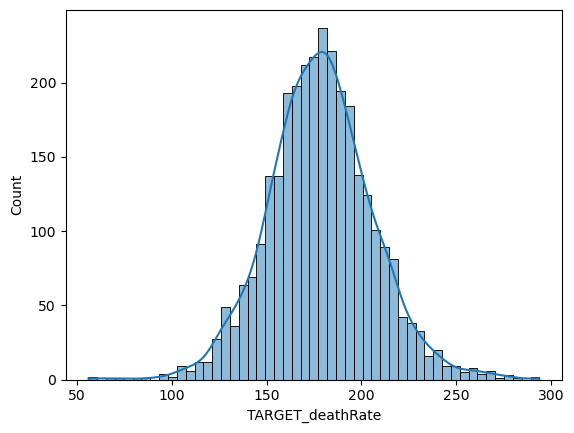

In [9]:
#plotando um histograma simples para dar uma olhada na distribuição
sns.histplot(data=df,x='TARGET_deathRate',kde=True)
plt.show()

In [10]:
#Skewness
df['TARGET_deathRate'].skew()

0.12931340277335948

Vemos aqui que o target está com a distribuição levemente distribuida para direita

## 4.Escolha de feature e modelo de regressão linear

### 4.1 Distribuições, outliers e tratamento dos dados 

Como dito anteriormente a váriavel escolhida foi avgDeathsPerYear

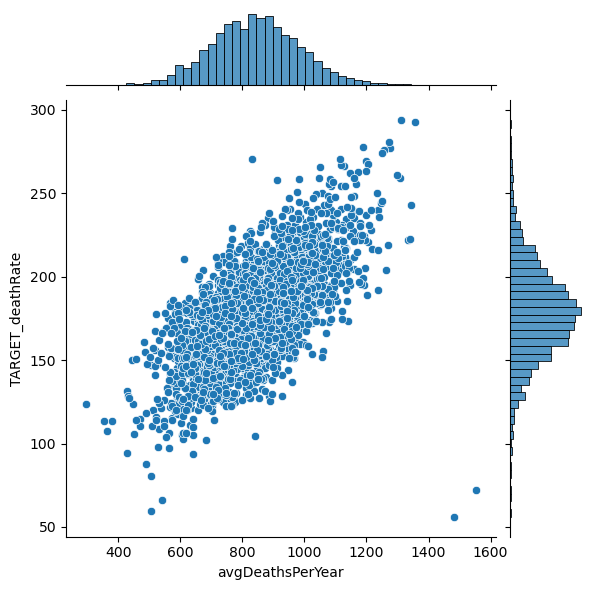

In [11]:
#plotando para perceber outliers na primeira variável
sns.jointplot(data=df,x='avgDeathsPerYear',y='TARGET_deathRate')
plt.show()

É possível ver que o gráfico de dispersão lembra bastante uma reta de coeficiente positivo, com outliers que serão tratados agora

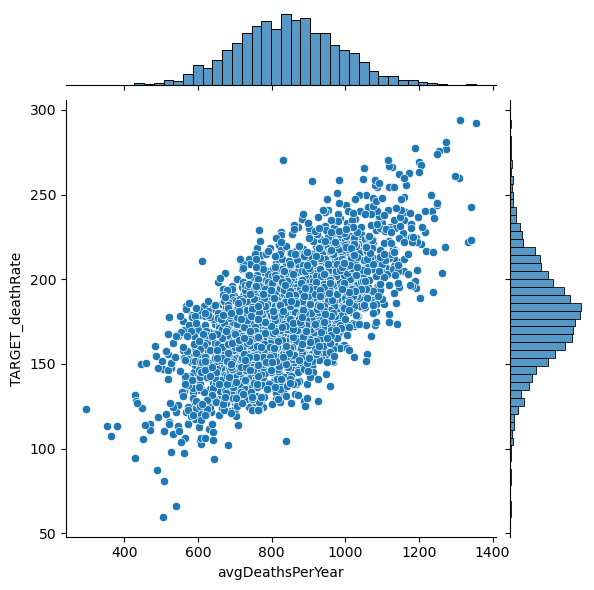

In [12]:
#Outlier da primeira variável
df=df[~(df['avgDeathsPerYear']>1400)]
sns.jointplot(data=df,x='avgDeathsPerYear',y='TARGET_deathRate')
plt.show()

Os pontos que não estavam "respeitando a reta" foram devidamente tratados

### 4.2 Modelo de Regressão Linear Simples para a variável avgDeathsPerYear

In [13]:
#importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
#Definindo os alvos
X=df['avgDeathsPerYear']
y=df['TARGET_deathRate']

In [15]:
#importando o método e separando em dados de treino e teste
reg_lin= LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#avaliando o shape das variáveis
X.shape,y.shape

((3045,), (3045,))

In [17]:
#avaliando o shape dos dados de treino
X_train.shape,y_train.shape

((2436,), (2436,))

In [18]:
#avaliando o shape dos dados de teste
X_test.shape,y_test.shape

((609,), (609,))

In [19]:
#Treinando o modelo com o valor de treino já com reshape
reg_lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [20]:
#checando os valores do intercept e coeficiente
print(reg_lin.intercept_)
print(reg_lin.coef_[0])

62.71553899101863
0.1373212837577564


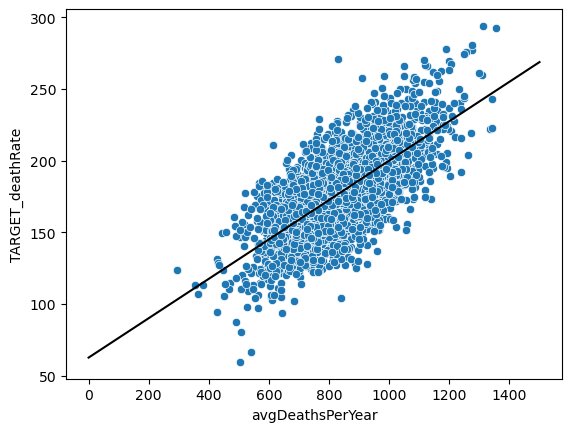

In [21]:
#plotando o gráfico juntamente com a equação da reta calculada pelo modelo para visualização
sns.scatterplot(data=df,x='avgDeathsPerYear',y='TARGET_deathRate')
x=np.linspace(0,1500,10000)
y=reg_lin.intercept_+reg_lin.coef_[0]*x
plt.plot(x,y,color='black')
plt.show()

In [22]:
#Predição para avaliação do modelo
y_pred=reg_lin.predict(X_test.values.reshape(-1,1))
y_pred

array([175.19813837, 168.59464593, 159.04799143, 134.01007575,
       136.839109  , 194.62912163, 194.59577393, 193.21347142,
       193.71981732, 123.63737037, 170.16659098, 171.55252791,
       175.49551903, 188.76406743, 226.1329581 , 173.83296872,
       183.31008935, 201.17657753, 194.08182753, 153.31076978,
       173.40910475, 157.45387272, 179.31654031, 161.02114871,
       195.37198393, 186.17846977, 192.59260728, 201.97046389,
       180.41455214, 175.40606486, 166.68169329, 148.85664257,
       186.4058036 , 181.37391838, 176.73527392, 167.76032176,
       174.39141787, 174.13641619, 200.67901022, 167.11891503,
       204.01165636, 184.79164043, 195.89882957, 183.85374772,
       169.02078173, 211.35328196, 180.73367539, 184.5807413 ,
       232.53106954, 182.3147663 , 178.96310538, 193.6476371 ,
       163.42417235, 187.11448408, 168.66605263, 179.39736497,
       152.61268471, 161.72863873, 180.76343429, 175.03364317,
       201.82105838, 174.04574918, 176.65549687, 149.69

In [23]:
residuo=y_test-y_pred
residuo

1287     3.901862
642    -19.694646
1146    -9.247991
1279    12.589924
1941   -70.539109
          ...    
1920   -14.839293
2884    19.652392
2405     7.621413
498    -15.095424
2829   -19.031153
Name: TARGET_deathRate, Length: 609, dtype: float64

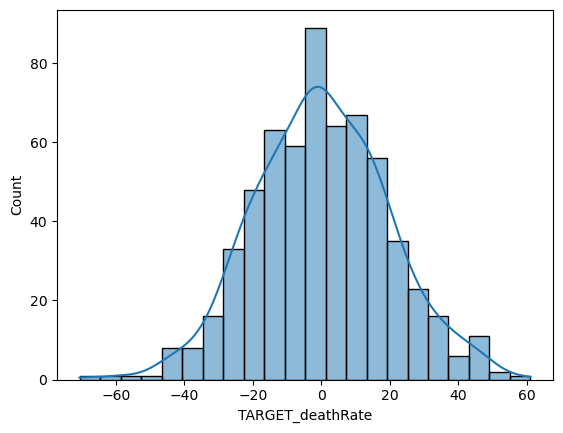

In [24]:
sns.histplot(residuo,kde=True)
plt.show()

In [25]:
from scipy.stats import normaltest
test_stat, p=normaltest(residuo)
alpha=0.05
if p>alpha:
    print("Amostra obedece uma curva normal")
else:
    print("Amostra não obedece uma curva normal")

Amostra obedece uma curva normal


## 4.3 Métricas de avaliação para resultado do modelo

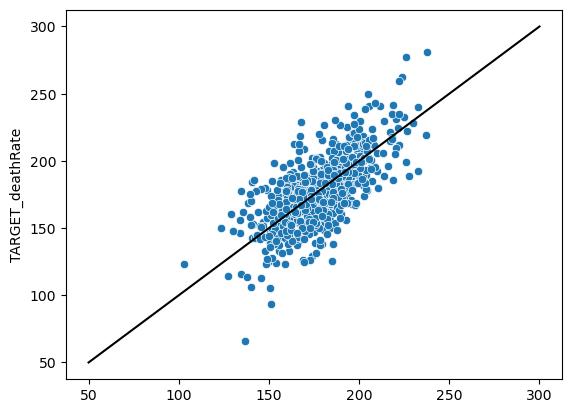

In [26]:
#avaliando o gráfico dos dados de predição pelos de teste
x = np.linspace(50, 300, 10000)
y = x
plt.plot(x,y,color='black')

sns.scatterplot(x=y_pred, y=y_test)
plt.show()

In [27]:
#Calculando as principais métricas
from sklearn import metrics
#MAE
mae=metrics.mean_absolute_error(y_test,y_pred)
#MSE
mse=metrics.mean_squared_error(y_test,y_pred)
#RMSE
rmse=metrics.mean_squared_error(y_test,y_pred,squared=False)
print(mae)
print(mse)
print(rmse)

15.434911353896473
381.0586034891743
19.520722412072107


In [28]:
#métrica R^2
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.46799819149288

## 5. Regressão Linear Múltipla

Primeiramente irei revisar o conjunto de dados pois agora irei trabalhar com mais variáveis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3045 non-null   float64
 1   avgDeathsPerYear         3045 non-null   float64
 2   TARGET_deathRate         3045 non-null   float64
 3   incidenceRate            3045 non-null   float64
 4   medIncome                3045 non-null   float64
 5   popEst2015               3045 non-null   float64
 6   povertyPercent           3045 non-null   float64
 7   studyPerCap              3045 non-null   float64
 8   binnedInc                3045 non-null   object 
 9   MedianAge                3045 non-null   float64
 10  MedianAgeMale            3045 non-null   float64
 11  MedianAgeFemale          3045 non-null   float64
 12  Geography                3045 non-null   object 
 13  AvgHouseholdSize         3045 non-null   float64
 14  PercentMarried          

Como features com dados faltantes podem interferir no modelo irei retirar elas!. Juntamente com os dados do tipo object que não se encaixam mais no modelo

In [30]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3045 non-null   float64
 1   avgDeathsPerYear        3045 non-null   float64
 2   TARGET_deathRate        3045 non-null   float64
 3   incidenceRate           3045 non-null   float64
 4   medIncome               3045 non-null   float64
 5   popEst2015              3045 non-null   float64
 6   povertyPercent          3045 non-null   float64
 7   studyPerCap             3045 non-null   float64
 8   MedianAge               3045 non-null   float64
 9   MedianAgeMale           3045 non-null   float64
 10  MedianAgeFemale         3045 non-null   float64
 11  AvgHouseholdSize        3045 non-null   float64
 12  PercentMarried          3045 non-null   float64
 13  PctNoHS18_24            3045 non-null   float64
 14  PctHS18_24              3045 non-null   

In [31]:
X=df.drop(columns=['TARGET_deathRate'])
y=df['TARGET_deathRate']

In [32]:
#montando o modelo
reg_mul= LinearRegression()
X_treino,X_teste,y_treino,y_teste,=train_test_split(X,y,test_size=0.2,random_state=42)
multi=reg_mul.fit(X_treino,y_treino)
pred=multi.predict(X_teste)

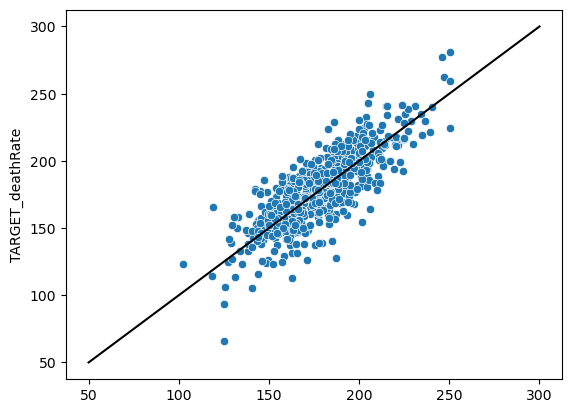

In [33]:
#plotando gráficos para melhor visualização do valor de predito e o de teste
plt.plot(np.linspace(50,300,10000),np.linspace(50,300,10000),color="black")
sns.scatterplot(x=pred,y=y_teste)
plt.show()

O gráfico aparenta melhor, afinal os pontos estão mais próximos da reta do que no de regressão simples

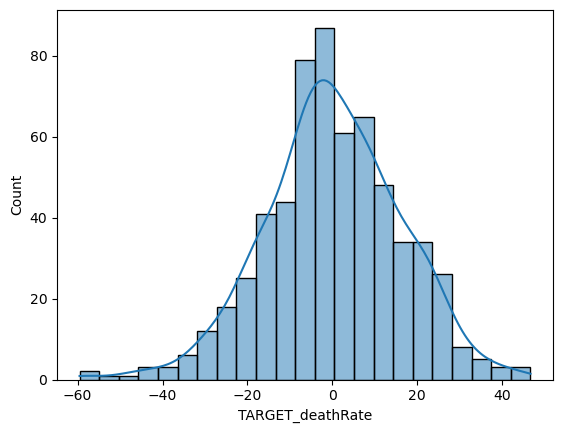

In [34]:
#Destribuição do resíduo
residuo=y_teste-pred
sns.histplot(residuo,kde=True)
plt.show()

In [35]:
from scipy.stats import normaltest
test_stat, p=normaltest(residuo)
alpha=0.05
if p>alpha:
    print("Amostra obedece uma curva normal")
else:
    print("Amostra não obedece uma curva normal")

Amostra não obedece uma curva normal


In [36]:
#Calculando as principais métricas
from sklearn import metrics
#MAE
mae=metrics.mean_absolute_error(y_teste,pred)
#MSE
mse=metrics.mean_squared_error(y_teste,pred)
#RMSE
rmse=metrics.mean_squared_error(y_teste,pred,squared=False)
print(mae)
print(mse)
print(rmse)

12.527494676660297
257.81449310111276
16.056602788295933


In [37]:
#métrica R^2
from sklearn.metrics import r2_score
r2_score(y_teste,pred)

0.6400611996862184

O modelo parece melhor, as métricas de erro diminuíram, e o r^2 está mais próximo de 1, o que significa que ele é um modelo mais adequado até o momento

## 5.2 Modelo de regressão linear múltipla com mini-max scaler

In [38]:
#Dividindo novamente os dados, instanciando a regressão e o min max e treinando o modelo
reg_lin=LinearRegression()
X_treino,X_teste,y_treino,y_teste=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_treino)
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)
X_treino = mms.fit_transform(X_treino)
X_teste = mms.transform(X_teste)
modelo=reg_lin.fit(X_treino,y_treino)

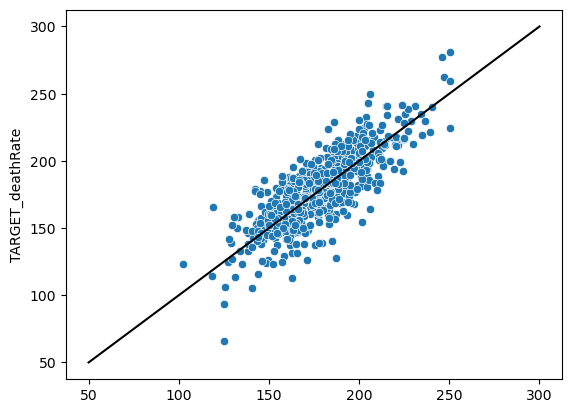

In [39]:
#Fazendo as previsões
y_pred=modelo.predict(X_teste)
plt.plot(np.linspace(50,300,10000),np.linspace(50,300,10000),color="black")
sns.scatterplot(x=y_pred,y=y_teste)
plt.show()

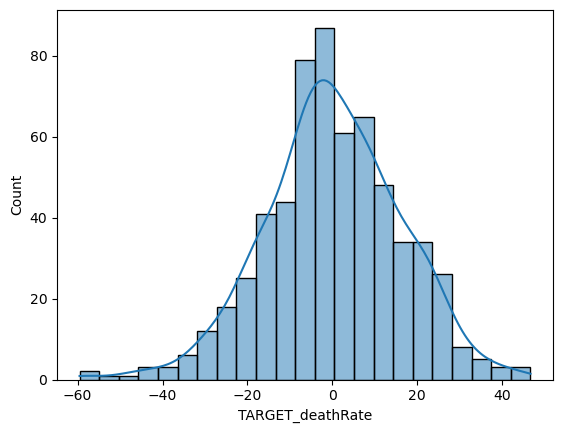

In [40]:
#Residuos
residuo=y_teste-y_pred
sns.histplot(residuo,kde=True)
plt.show()

In [41]:
#Calculando as principais métricas
from sklearn import metrics
#MAE
mae=metrics.mean_absolute_error(y_teste,y_pred)
#MSE
mse=metrics.mean_squared_error(y_teste,y_pred)
#RMSE
rmse=metrics.mean_squared_error(y_teste,y_pred,squared=False)
print(mae)
print(mse)
print(rmse)

12.527494676660927
257.81449310115806
16.056602788297344


In [42]:
#métrica R^2
from sklearn.metrics import r2_score
r2_score(y_teste,y_pred)

0.6400611996861552

In [43]:
# Avaliando os coeficientes para ver as features mais importantes
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])
coeff_df.abs().sort_values(by='Parameter value', ascending=False)

Parameter value
incidenceRate                106.580629
avgDeathsPerYear              89.526662
PctMarriedHouseholds          35.880178
PctPrivateCoverage            34.491305
PctBachDeg25_Over             31.750673
PctOtherRace                  31.632869
PercentMarried                29.323286
MedianAgeMale                 21.995272
PctEmpPrivCoverage            14.187109
PctHS25_Over                  14.035062
PctUnemployed16_Over          13.954208
povertyPercent                13.376737
avgAnnCount                   12.885145
medIncome                     12.677916
PctHS18_24                    11.014655
popEst2015                    10.156933
BirthRate                      8.807763
MedianAgeFemale                6.835115
PctNoHS18_24                   5.289277
PctPublicCoverageAlone         5.277688
PctPublicCoverage              5.167900
PctBachDeg18_24                4.836820
PctBlack                       4.756807
studyPerCap                    4.139157
PctWhite                       3.760041
AvgHouseholdSize               2.456448
MedianAge                      1.687953
PctAsian                       0.981998

É possível concluir que as Features mais importantes são média de câncer a cada 100 mil habitantes, mortalidade por cancer reportada anual. Que foram duas das features que eu presumi no começo do projeto que poderiam ser relevantes. A minha surpresa na verdade é o dado de Porcentagens de famílias casadas ter um valor de coeficiente absoluto maior que outras features que eu supus inicialmente, e vir em terceira na localização

## 6. Conclusão

Sejam as métricas em ordem MAE, MSE RMSE, R^2 do primeiro modelo:
    15.434911353896473
    381.0586034891743
    19.520722412072107
    0.46799819149288
    
Sejam as métricas em ordem MAE, MSE RMSE, R^2 do segundo modelo:
    12.527494676660297
    257.81449310111276
    16.056602788295933
    0.6400611996862184
    
Sejam as métricas em ordem MAE, MSE RMSE, R^2 do terceiro modelo:
    12.527494676660927
    257.81449310115806
    16.056602788297344
    0.6400611996861552

Por fim é possível concluir que o modelo mais eficiente foi o segundo, o de Regressão Linear Múltipla sem o min-max scaler, mas ainda haveriam coisas que poderiam ser futuramente realizadas, como a remoção das features não tão relevantes para ver se o modelo 2 ainda seria o superior!